## Метод бутстрапа

### Теоритическая справка

**Доверительный интервал** - это диапазон значений, который с определенной степенью уверенности включает истинне значение параметра генеральной совокупности на основе выборочных данных. Проще говоря, это интервал, в котором, как мы предпологаем, находится истинное значение параметра, и мы можем указать насколько уверены в этом предположении (обычно в процентах, например 95%).

**Бутстрап** — это вычислительный статистический метод, который позволяет оценить распределение выборочной статистики (например: медиана, эксцесс, куртозис, среднее значение) путем многократной генерации выборок методом Монте-Карло на основе уже имеющейся выборки.

**Бутстрап-выборка** — это псевдовыборка с повторениями, извлеченная из исходной выборки, то есть в бутстрап-выборке может попасться несколько раз одно и то же наблюдение из исходной выборки. Более того, бутстрап-выборка должна быть равной по объему исходной выборке.

#### Основные шаги бутстрапа

1. ***Выборка с возвращением.***. 
Из исходного набора данных $ X_1, \ldots, X_n $ многократно (M раз) генерируются новые выборки такого же размера:

$$X^*_{1;1}, X^*_{2;1}, \ldots, X^*_{n;1};$$
$$X^*_{1;2}, X^*_{2;2}, \ldots, X^*_{n;2};$$
$$X^*_{1;3}, X^*_{2;3}, \ldots, X^*_{n;3};$$
$$X^*_{1;4}, X^*_{2;4}, \ldots, X^*_{n;4};$$

2. ***Вычисление статистики.***
Для каждой бутстрап-выборки вычисляется интересующая нас статистика.

3. ***Оценка распределения.***
Полученные значения статистики образуют новую выборку, которая используется для оценки доверительных интервалов и других характеристик. Для получения ДИ уровня 95% можно выбросить по 2.5% самых маленьких и самых больших элементов этой выборки, а в качестве ДИ взять наименьший интервал, слдержащий все оставшиеся элементы.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [54]:
np.random.seed(42)
x = np.random.exponential(scale = 1.0, size = 10000)
x

array([0.46926809, 3.01012143, 1.31674569, ..., 2.93196746, 0.50664768,
       0.24480191])

In [55]:
def generating_bootstrap_sample(x, ammount_samples = 100):
    """
    The function is designed to generate bootstrap samples from input data
    Parametrs: 
    x: input-data from which bootstrap samples are generated.
    ammount_samples: number of bootstrap samples to generate.

    returns:
    numpy.ndarray: An array of shape(N, ammount_samples) containing the botstrap samples.
    """

    N = x.size
    samples = np.random.choice(x, size = (ammount_samples, N), replace=True)

    return samples

In [56]:
def calculating_statistics_for_samples(samples, statistic_func):
    """
    The function is calculating statistics for each boorstrap samples.
    Parametrs: 
    samples: bootstrap samples for which statistics need to be calculated.
    statistic_func: function for calculating statistics.

    returns:
    numpy.ndarray: An array of statistics (1, ammount_samples) containing the statisticd for each bootstrap samples.
    """
    statistics = np.apply_along_axis(statistic_func, 1, samples)
    return statistics

#### MAD

***Медианное абсолютное отклонение (MAD)*** - это мера разброса данных $ X_1, \ldots X_n $, которая менее чувствительна к выбросам по сравнению со стандартным отклонением. Она определяется как медиана абсолютных отклонений наблюдений от общей медианы выборки:
$$ MAD = median(\{|X_i - median(X_1, \ldots X_n)|\}^n_{i=1})$$


#### 95% ДИ для MAD

In [57]:
MAD_samples = generating_bootstrap_sample(x, 10**3)
MAD_samples.shape

(1000, 10000)

In [58]:
def calculating_MAD (data):
    """
    The function is calculating MAD fors data.
    Parametrs: 
    data: sample for which need to be calculated MAD
    
    returns:
    mad 
    """
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    return mad

In [59]:
MAD_boot = calculating_statistics_for_samples(MAD_samples, calculating_MAD)
MAD_boot

array([0.47928009, 0.4838636 , 0.4730015 , 0.45752438, 0.46275853,
       0.47609239, 0.47249775, 0.45346041, 0.47526678, 0.45455526,
       0.45818736, 0.46941899, 0.46895034, 0.47585446, 0.46860246,
       0.47087333, 0.4563874 , 0.47205007, 0.47696631, 0.46416041,
       0.46147064, 0.45309185, 0.46805876, 0.46217259, 0.4652459 ,
       0.46054516, 0.47036514, 0.47101829, 0.46430271, 0.47076421,
       0.4806918 , 0.47649426, 0.46400983, 0.47124568, 0.45733561,
       0.45710043, 0.46110172, 0.4529176 , 0.47319993, 0.46408025,
       0.46910934, 0.47450092, 0.45775764, 0.47081226, 0.4783269 ,
       0.47752912, 0.46891836, 0.47574162, 0.45970004, 0.47321866,
       0.47725244, 0.47563154, 0.48055216, 0.46212803, 0.47816825,
       0.45847669, 0.46727802, 0.47724146, 0.45818031, 0.46065297,
       0.46589637, 0.45965832, 0.46511718, 0.46858134, 0.46826216,
       0.47658307, 0.4620578 , 0.47423246, 0.48367241, 0.46022338,
       0.47933861, 0.47552445, 0.4645688 , 0.46808893, 0.46316

In [60]:
MAD_boot.size

1000

In [61]:
alpha1 = 0.025
q1 = np.quantile(MAD_boot, alpha1)
q2 = np.quantile(MAD_boot, 1-alpha1)  

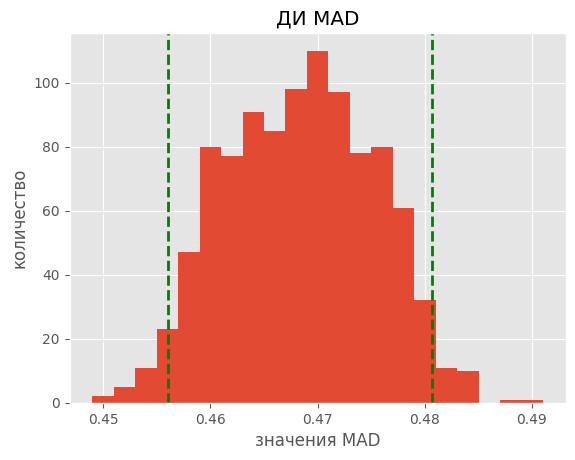

In [78]:
plt.hist(MAD_boot, bins = 'auto',  density=False)

plt.axvline(q1, color = 'green', linestyle='dashed', linewidth = 2, label = "Q1 (2,5%)")
plt.axvline(q2, color = 'green', linestyle='dashed', linewidth = 2, label = "Q2 (97.5%)")

plt.title('ДИ MAD')
plt.xlabel('значения MAD')
plt.ylabel('количество')

plt.show()

### 95% ДИ для выборочной дисперсии

In [63]:
Dispersion_samples = generating_bootstrap_sample(x, 10**3)
Dispersion_samples.shape

(1000, 10000)

In [70]:
def calculating_Dispersion(data):
    """
    The function is calculating sample dispersion for data.
    Parametrs: 
    data: sample for which need to be calculated sample dispersion
    
    returns:
    sample dispersion
    """
    x_mean = np.mean(data)
    S_2 = (np.sum((data - x_mean)**2))/data.size
    return S_2

In [71]:
Dispersion_boot = calculating_statistics_for_samples(Dispersion_samples, calculating_Dispersion)
Dispersion_boot

array([0.94011124, 0.94193518, 0.93736534, 0.99192077, 0.95172561,
       0.95067652, 0.95891841, 0.95834945, 0.9444703 , 0.92451194,
       0.96689656, 0.94076215, 0.97668642, 0.96624402, 0.96613985,
       0.97397108, 0.96970251, 0.93634584, 0.90530841, 0.99814143,
       0.9794822 , 0.94700745, 1.00065304, 0.96127283, 0.95713847,
       0.95436324, 0.95552985, 0.92810153, 0.96128119, 0.94311765,
       0.95449441, 0.94052086, 0.99180861, 0.96775942, 0.954301  ,
       0.96510009, 0.9568763 , 0.96642835, 0.93729297, 0.95566837,
       0.95095325, 0.95508789, 0.91764234, 0.93997251, 0.96621454,
       0.92066164, 0.93830248, 0.96568707, 0.95846186, 0.96964826,
       1.00051735, 0.93082787, 1.00778791, 0.96153947, 0.94610822,
       0.9298047 , 0.96363805, 0.96036618, 0.93120213, 0.97319927,
       0.98533669, 0.9610524 , 0.9373081 , 0.94701224, 0.96210898,
       0.94894302, 0.92920291, 0.94486854, 0.95759955, 0.92361642,
       0.95345779, 0.92454366, 0.95837491, 0.93456626, 0.94701

In [73]:
Dispersion_boot.size

1000

In [74]:
alpha2 = 0.025
q3 = np.quantile(Dispersion_boot, alpha1)
q4 = np.quantile(Dispersion_boot, 1-alpha1)  

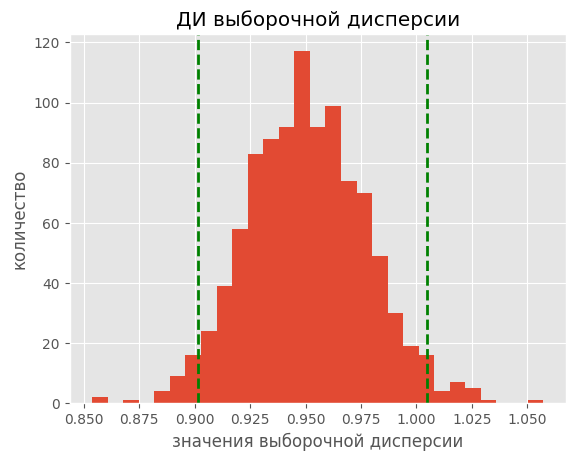

In [77]:
plt.hist(Dispersion_boot, bins = 'auto',  density=False)

plt.axvline(q3, color = 'green', linestyle='dashed', linewidth = 2, label = "Q1 (2,5%)")
plt.axvline(q4, color = 'green', linestyle='dashed', linewidth = 2, label = "Q2 (97.5%)")

plt.title('ДИ выборочной дисперсии')
plt.xlabel('значения выборочной дисперсии')
plt.ylabel('количество')

plt.show()